# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn. ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data=pd.read_csv("gld_price_data.csv") #Reading the Dataset

In [4]:
gold_data #Dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
gold_data.head() #showing the Top 5 values in the Dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail() #showing the Bottom 5 values in the Dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.isna() #checking the dataset whether it as Missing values

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [8]:
gold_data.isna().sum() #count the number of missing values in each column

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data=gold_data.drop(['Date'], axis=1) #Removing the Date column from the Dataset

In [10]:
gold_data #Dataset

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [11]:
gold_data.head() #showing the Top 5 values in the Dataset

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
gold_data.shape #Displaying the number of Rows and columns in the dataset

(2290, 5)

In [13]:
gold_data.info() #Showing the total number of entries (non-null values) in each columns and The data type of each columns and The memory usage of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [14]:
#Dividing the Independent and Dependent variable

x=gold_data.drop(['GLD'], axis=1)
y=gold_data['GLD'] 

In [15]:
x.head() #showing the Top 5 values of 'x' in the Dataset

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [16]:
y.head() #showing the Top 5 values of  ['GLD'] Column of 'y'in the Dataset

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split #importing libraries

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # Split the data into training and testing sets

In [19]:
x_train # x_train typically refers to the training data for the features (independent variables) used to train a machine learning model.

,SPX,USO,SLV,EUR/USD
583,1104.180054,32.889999,19.320000,1.269309
2242,2713.830078,12.370000,15.460000,1.223032
1803,1978.349976,9.150000,14.170000,1.088898
1491,1904.010010,31.139999,16.730000,1.279525
1719,2090.350098,14.690000,15.260000,1.103704
...,...,...,...,...
1033,1461.050049,34.119999,33.570000,1.305824
1731,2023.040039,13.060000,13.590000,1.081502
763,1283.500000,36.009998,34.369999,1.427002
835,1218.280029,35.200001,32.330002,1.386001


In [20]:
x_test #'x_test'typically refers to the test data for the features (independent variables) used to evaluate a machine learning model's performance.

,SPX,USO,SLV,EUR/USD
1255,1692.770020,36.880001,20.980000,1.351698
2100,2425.530029,9.270000,14.990000,1.147394
711,1309.660034,42.049999,36.119999,1.410596
1328,1838.699951,33.689999,19.510000,1.361804
53,1298.420044,82.290001,18.250999,1.563893
...,...,...,...,...
140,1213.599976,74.989998,10.400000,1.432932
1902,2187.020020,11.300000,18.770000,1.134945
5,1409.130005,75.250000,15.520000,1.466405
58,1325.760010,85.730003,18.320000,1.581403


In [21]:
from sklearn.ensemble import RandomForestRegressor 

In [22]:
rfr= RandomForestRegressor() #creating an instance of the RandomForestRegressor Class and assigning it to the variable "rfr".

In [23]:
rfr.fit(x_train,y_train) # It is used to train (fit) the RandomForestRegressor model rfr on the training data x_train and corresponding target values y_train

RandomForestRegressor()

In [24]:
# It is used to make predictions on the test data (x_test) using the trained RandomForestRegressor model 'rfr'
t_pred=rfr.predict(x_test)
t_pred

array([126.996999  , 116.86509968, 139.5860009 , 122.12289999,
        94.37740049, 155.00480091, 117.70690083, 113.32610155,
       153.19790075, 105.43340056, 103.21159924, 120.17790073,
        91.92829919, 157.48970095, 121.35609907, 117.31490127,
        86.25209812,  91.93479922,  92.96859986, 125.77190061,
        83.55969949, 118.10129888, 126.08849882, 173.45779735,
       169.90669664, 139.90260209, 114.72449937, 159.8544008 ,
       133.73870131, 116.50650047, 111.12920101, 104.84740198,
       128.03900056, 121.86659898,  98.93150007, 119.96859981,
        84.02840069, 115.10430005, 127.31379884, 140.41769846,
       107.83100101, 131.77100042, 108.40009874, 134.99569934,
       133.42279908, 148.97179983, 119.73590041, 155.84010064,
       154.60600187, 127.55549992, 123.51910051, 115.09459863,
       123.97950064, 118.89289996, 153.73910078, 121.52719988,
       112.10510014,  86.76699939, 156.09239989, 118.2756009 ,
        88.47049957, 114.80329975,  83.09019972, 146.44

In [25]:
y_pred= list(t_pred) #  It converts the predicted values stored in t_pred  and assigns them to the variable y_pred.

In [26]:
y_pred # It is a variable that now holds these predicted values in list format.

[126.9969989999999,
 116.86509967999997,
 139.58600090000002,
 122.12289998999991,
 94.37740049000001,
 155.00480090999997,
 117.70690083,
 113.32610155000015,
 153.19790075,
 105.43340056,
 103.21159924000003,
 120.17790072999995,
 91.92829919000003,
 157.48970094999999,
 121.35609907000004,
 117.3149012700001,
 86.25209812000001,
 91.93479921999999,
 92.96859986000003,
 125.77190061000005,
 83.55969948999999,
 118.10129888000003,
 126.0884988199998,
 173.45779735,
 169.90669663999995,
 139.90260208999996,
 114.72449937000005,
 159.85440080000006,
 133.73870131,
 116.50650046999988,
 111.12920100999996,
 104.84740197999992,
 128.03900055999992,
 121.86659897999992,
 98.93150006999993,
 119.96859980999989,
 84.02840069000005,
 115.10430005000008,
 127.3137988400001,
 140.41769846000014,
 107.83100101,
 131.77100041999992,
 108.40009873999993,
 134.99569933999996,
 133.42279907999998,
 148.9717998299999,
 119.73590041000017,
 155.84010064000003,
 154.6060018700001,
 127.55549991999999,


In [30]:
accuracy = rfr.score(x_test, y_test) # Calculate the R² score of the RandomForestRegressor model (rfr) on the test data (x_test and y_test)
print("R² score:", accuracy) # Print the R² score with the label "R² score:"


R² score: 0.9877208282331115


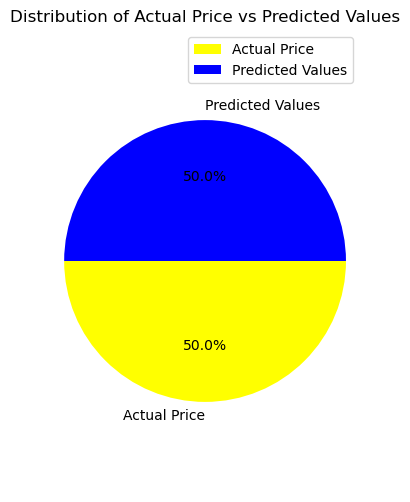

In [27]:
import matplotlib.pyplot as plt

# Sample data for pie chart
labels = ['Actual Price', 'Predicted Values']
sizes = [sum(y_pred), sum(t_pred)]  # Assuming y_pred and t_pred are arrays

# Colors for each section of the pie chart
colors = ['yellow', 'blue']

# Create pie chart
plt.figure(figsize=(4, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Actual Price vs Predicted Values')
plt.legend()
plt.show()


# conclusion:-
                     The visualization illustrates the distribution of actual prices compared to predicted values,Lastly the pie chart offers a holistic view of the overall distribution, presenting the proportion of actual prices vs predicted values. This concise representation allows for a quick grasp of the relative sizes of each dataset.

